# CH2补充知识

In [325]:
"""
    Author: <李昌峻>
    Date:    2024/9/26
    Version: 1.0
    Encoding: UTF-8
    Description: 数据挖掘课程CH2补充知识
    Email: changjunli049@gmail.com
"""

'\n    Author: <李昌峻>\n    Date:    2024/9/26\n    Version: 1.0\n    Encoding: UTF-8\n    Description: 数据挖掘课程CH2补充知识\n    Email: changjunli049@gmail.com\n'

In [371]:
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random,mat
from scipy import stats
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')
# 设置绘图中的中文显示，不设置的话，会出现乱码情况。Windows系统和macOS系统设置方式不同，请注意。
font = FontProperties(fname=r"/System/Library/Fonts/Hiragino Sans GB.ttc", size=14)    # macos 下的字体
# font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    #  windows

## 2.1文件的加载

利用python，我们可以处理.csv或Excel文件，.csv文件格式打开类似于excel文档。\
通常，需要处理和分析的数据信息保存在.csv文件中

In [327]:
# 文件读入：一般用pandas来打开文件：
# 这里给出的数据为excel数据，打开原理：
data = (pd.read_excel('Cancer.xlsx',header=None)) # 同一目录下可以直接使用文件名（相对路径） header表示是否有列名字
data_1= pd.read_excel(r'/Users/AlexLeeMac/Desktop/Data_Mining_course_2024/Chapter2/Cancer.xlsx',header=None) #使用绝对路径

# data=pd.read_csv() 为打开.csv文件

print(data.head())


   0  1  2  3  4   5  6  7  8  9
0  5  1  1  1  2   1  3  1  1  2
1  5  4  4  5  7  10  3  2  1  2
2  3  1  1  1  2   2  3  1  1  2
3  6  8  8  1  3   4  3  7  1  2
4  4  1  1  3  2   1  3  1  1  2


In [328]:
print(data_1)

     0   1   2  3  4   5   6   7  8  9
0    5   1   1  1  2   1   3   1  1  2
1    5   4   4  5  7  10   3   2  1  2
2    3   1   1  1  2   2   3   1  1  2
3    6   8   8  1  3   4   3   7  1  2
4    4   1   1  3  2   1   3   1  1  2
..  ..  ..  .. .. ..  ..  ..  .. .. ..
678  3   1   1  1  3   2   1   1  1  2
679  2   1   1  1  2   1   1   1  1  2
680  5  10  10  3  7   3   8  10  2  4
681  4   8   6  4  3   4  10   6  1  4
682  4   8   8  5  4   5  10   4  1  4

[683 rows x 10 columns]


In [329]:
# 转化为矩阵形式
matrix_data = data.values
print(matrix_data)

[[ 5  1  1 ...  1  1  2]
 [ 5  4  4 ...  2  1  2]
 [ 3  1  1 ...  1  1  2]
 ...
 [ 5 10 10 ... 10  2  4]
 [ 4  8  6 ...  6  1  4]
 [ 4  8  8 ...  4  1  4]]


In [330]:
matrix_data #(pandas格式打开)

array([[ 5,  1,  1, ...,  1,  1,  2],
       [ 5,  4,  4, ...,  2,  1,  2],
       [ 3,  1,  1, ...,  1,  1,  2],
       ...,
       [ 5, 10, 10, ..., 10,  2,  4],
       [ 4,  8,  6, ...,  6,  1,  4],
       [ 4,  8,  8, ...,  4,  1,  4]])

## 2.2Numpy使用

Numpy的API使用官方文档：https://www.numpy.org.cn/reference/ \
本节将会对Numpy中常用方式进行展示


In [331]:
# 求矩阵均值：
# 计算整个矩阵的均值
mean_all = np.mean(matrix_data)

# 计算每一列的均值
mean_columns = np.mean(matrix_data, axis=0)

# 计算每一行的均值
mean_rows = np.mean(matrix_data, axis=1)

mean_columns

array([4.44216691, 3.15080527, 3.21522694, 2.83016105, 3.23426061,
       3.54465593, 3.44509517, 2.86969253, 1.60322108, 2.69985359])

In [332]:
mean_rows

array([1.8, 4.3, 1.7, 4.3, 1.9, 7.4, 2.3, 1.6, 1.7, 1.7, 1.3, 1.4, 3.2,
       1.6, 6.4, 4. , 1.6, 1.7, 5.5, 1.9, 5.4, 5.8, 1.5, 1.4, 3.7, 1.5,
       1.7, 1.4, 1.4, 1.4, 1.5, 5.8, 1.6, 1.6, 1.4, 6.7, 2.3, 5. , 4.3,
       4.1, 6.3, 4.2, 6.6, 1.4, 5.1, 1.3, 1.9, 5.3, 4. , 3.3, 4.9, 6.2,
       5.5, 4.8, 5.5, 3.8, 3.8, 3.6, 4.3, 1.4, 5.9, 3.8, 1.3, 4.3, 1.7,
       4.9, 6.4, 1.5, 1.9, 6.7, 2.4, 6.1, 4. , 1.8, 1.6, 2. , 1.8, 1.5,
       2. , 1.7, 1.9, 2.1, 6.8, 6.4, 4.2, 5.7, 1.7, 1.6, 1.4, 1.5, 1.7,
       1.3, 1.5, 1.4, 1.4, 1.8, 6.7, 6.7, 5.3, 3.2, 1.8, 3.6, 7.9, 4. ,
       6. , 6. , 1.5, 5.3, 2.3, 4.4, 5.5, 6.5, 2.1, 1.6, 2.7, 6.2, 1.6,
       1.8, 1.6, 1.9, 6.7, 4.5, 6.1, 1.3, 5.7, 1.6, 4.8, 2. , 1.9, 1.5,
       6.7, 1.6, 1.6, 2.1, 1.6, 1.4, 1.7, 1.4, 1.3, 4.6, 1.6, 1.4, 3.8,
       1.5, 3.3, 7.3, 1.3, 4.6, 6.6, 1.7, 1.2, 4.3, 1.5, 1.5, 7.4, 6.1,
       1.8, 1.6, 2. , 1.9, 6.4, 6.3, 1.6, 1.2, 1.4, 1.4, 1.3, 8.5, 4.8,
       6.4, 1.5, 5.9, 1.7, 3.9, 1.3, 1.2, 1.9, 6.4, 5. , 1.4, 5.

In [333]:
mean_all

3.1035139092240116

示例Cancer数据太大了，为了便于展示，我们重新定义一个新的简单矩阵。

### 2.2.1.矩阵的创建

numpy中的matrix和ndarray都可以表示形如矩阵。其中两者所能表示的数据维数不同，matrix 只能表示二维数据，而 ndarray 可以表示 N 维数据。\
一般，使用 numpy 的 array来表示。

In [334]:
# 创建一维数组
data_1=np.array([1,2,3,4])
print(data_1)

[1 2 3 4]


In [335]:
# 创建二维数组
data_2=np.array([[1,2,3,4],[4,5,6,7]])
print(data_2)
print("查看矩阵的形状：", data_2.shape)

[[1 2 3 4]
 [4 5 6 7]]
查看矩阵的形状： (2, 4)


In [336]:
# 创建全0数组
data_all0=np.zeros(shape=(2,4)) # 2行4列
print(data_all0)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [337]:
# 创建全1数组
data_all1=np.ones(shape=(3,3)) # 三行三列
print(data_all1)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [338]:
# 创建全空数组，不是真的空，而是趋于无限接近0的数
data_empty=np.empty(shape=(2,3))
print(data_empty)

[[2.e-323 2.e-323 2.e-323]
 [2.e-323 2.e-323 2.e-323]]


In [339]:
# 创建有序序列的数组
data = np.arange(2,10,2) # start：2，stop：10，step：2 满足左闭右开
print(data)

[2 4 6 8]


In [340]:
# 随机数数组
data_random = np.random.rand(3,4) #(0-1区间)
print(data_random)

[[0.06544279 0.92819307 0.41217245 0.41192852]
 [0.46409161 0.3318983  0.56540107 0.09516544]
 [0.54686876 0.9554187  0.86232206 0.29103884]]


In [341]:
# 其他区间（自定义）
data=np.random.randint(2,5,size=(3,5))  # 4行5列，start=2，stop=5 左闭右开
print(data)

[[3 3 4 4 2]
 [3 2 2 2 2]
 [2 2 3 2 2]]


In [342]:
#矩阵的转置
data.T
print(data.T)

[[3 3 2]
 [3 2 2]
 [4 2 3]
 [4 2 2]
 [2 2 2]]


In [343]:
# 矩阵的逆
data_mat=mat(data)
print(data_mat.I)

[[-0.05940594  0.56435644 -0.37623762]
 [ 0.04950495  0.02970297 -0.01980198]
 [-0.05940594 -0.43564356  0.62376238]
 [ 0.53465347 -0.07920792 -0.61386139]
 [-0.43564356  0.13861386  0.57425743]]


### 2.2.1计算

In [344]:
# 数组的加法
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
result = array1 + array2
print(result)

[5 7 9]


In [345]:
# 乘法 (对应元素相乘)
result = array1 * array2
print(result)

[ 4 10 18]


In [346]:
# 乘法
result = array1 @ array2
print(result)

32


## 2.2.2 书本中公式的调包实现

### 算数平均值

In [347]:
# 矩阵的均值计算

matrix = np.array([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])

mean_all = np.mean(matrix)

print("整个矩阵的算术平均值:", mean_all)

整个矩阵的算术平均值: 5.0


In [348]:
mean_columns = np.mean(matrix, axis=0)   # axis=0沿列计算均值
mean_rows = np.mean(matrix, axis=1)         # axis=1沿行计算均值
print(mean_rows)
print(mean_columns)

[2. 5. 8.]
[4. 5. 6.]


### 加权平均值

In [349]:
# 数据数组
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])

# 权重数组
weights = np.random.rand(3,3) # 随机生成3*3的权重
# 计算加权均值
weighted_mean = np.average(matrix, weights=weights)

print("加权均值:", weighted_mean)


加权均值: 5.241734760193179


### 中位数

In [350]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])

median_all = np.median(matrix)
median_columns = np.median(matrix, axis=0)  # 按列计算（保留列）
median_rows = np.median(matrix, axis=1)  # 按行计算 （保留行）
print(median_all)
print(median_columns)
print(median_rows)

5.0
[4. 5. 6.]
[2. 5. 8.]


### 众数

In [351]:
matrix = np.array([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 8]])

# 将矩阵展平成一维数组
flattened_matrix = matrix.flatten()

# 计算众数
mode_result = stats.mode(flattened_matrix)
# mode = stats.mode(data) 当data是一维的时候直接使用

mode_result 

ModeResult(mode=8, count=2)

## 我们实战处理：
## 对大型数据进行处理，再次使用Cancer数据集

In [352]:
data_df=pd.read_excel('Cancer.xlsx',header=None)
data_df

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [353]:
# 使用describe()可以直接展示相关信息
data_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 数据分布形态

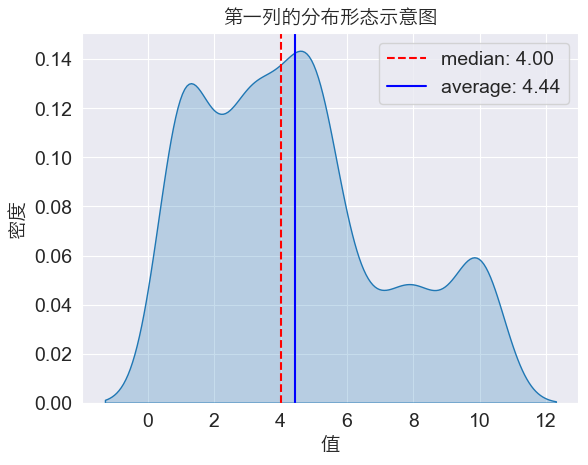

In [393]:
# 我们来看看第一列
first_column = data_df[0]
second_column = data_df[1]

# 计算中位数和均值
first_column.sort_values(ascending=True)
median_value = np.median(first_column)
mean_value = np.mean(first_column)

# 绘制密度函数
sns.kdeplot(first_column, fill=True)

# 在图中标注中位数和均值
plt.axvline(median_value, color='red', linestyle='--', label=f'median: {median_value:.2f}')
plt.axvline(mean_value, color='blue', linestyle='-', label=f'average: {mean_value:.2f}')

# 设置标题和标签
plt.title('第一列的分布形态示意图',fontproperties=font)
plt.xlabel('值',fontproperties=font)
plt.ylabel('密度',fontproperties=font)

# 显示图例
plt.legend()

# 显示图表
plt.show()

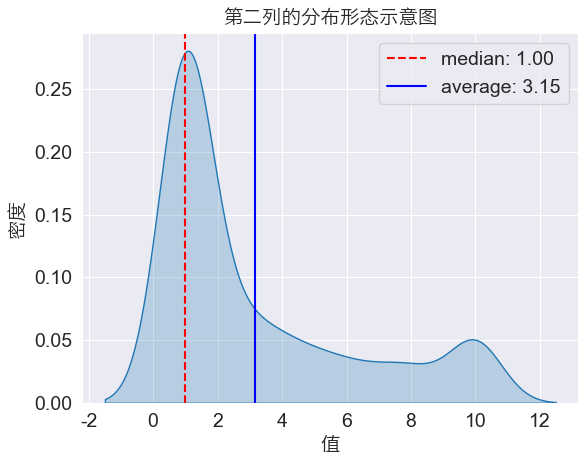

In [392]:
# 第二列
# 计算中位数和均值
second_column.sort_values(ascending=True)
median_value = np.median(second_column)
mean_value = np.mean(second_column)

# 绘制密度函数
sns.kdeplot(second_column, fill=True)

# 在图中标注中位数和均值
plt.axvline(median_value, color='red', linestyle='--', label=f'median: {median_value:.2f}')
plt.axvline(mean_value, color='blue', linestyle='-', label=f'average: {mean_value:.2f}')

# 设置标题和标签
plt.title('第二列的分布形态示意图',fontproperties=font)
plt.xlabel('值',fontproperties=font)
plt.ylabel('密度',fontproperties=font)

# 显示图例
plt.legend()

# 显示图表
plt.show()

In [355]:
first_column.describe()

count    683.000000
mean       4.442167
std        2.820761
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: 0, dtype: float64

### 中位数

In [356]:
median=np.median(first_column)
median

4.0

### 样本方差

In [357]:
# 计算样本方差
sample_variance = np.var(first_column, ddof=1) # ddof=1表示样本方差
sample_variance1=np.var(first_column, ddof=0) # ddof=0表示总体方差
print(sample_variance)
print(sample_variance1)

7.956694417847794
7.945044792052995


### 样本标准差

In [358]:
sample_std = np.std(first_column, ddof=1) #1表示样本标准差
sample_std1=np.std(first_column, ddof=0) # 0表示总体标准差
print(sample_std)
print(sample_std1)

2.8207613188371314
2.8186955834309235


### 极差

In [359]:
range_value=np.max(first_column)-np.min(first_column)
print(range_value)

9


### 分位数

In [360]:
data=first_column.sort_values(ascending=True)
# 计算第一四分位数 (Q1), 第二四分位数 (Q2), 第三四分位数 (Q3)
 # print(data)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)  # 或者 np.median(data)
Q3 = np.percentile(data, 75)

# 计算四分位间距 IQR
IQR = Q3 - Q1

print(f"第一四分位数 (Q1): {Q1}")
print(f"第二四分位数 (Q2) - 中位数: {Q2}")
print(f"第三四分位数 (Q3): {Q3}")
print(f"四分位间距 (IQR): {IQR}")

第一四分位数 (Q1): 2.0
第二四分位数 (Q2) - 中位数: 4.0
第三四分位数 (Q3): 6.0
四分位间距 (IQR): 4.0


### 最大最小观察值

In [361]:
min_obs = Q1 - 1.5*IQR
max_obs = Q2 + 1.5*IQR
print(min_obs,max_obs)

-4.0 10.0


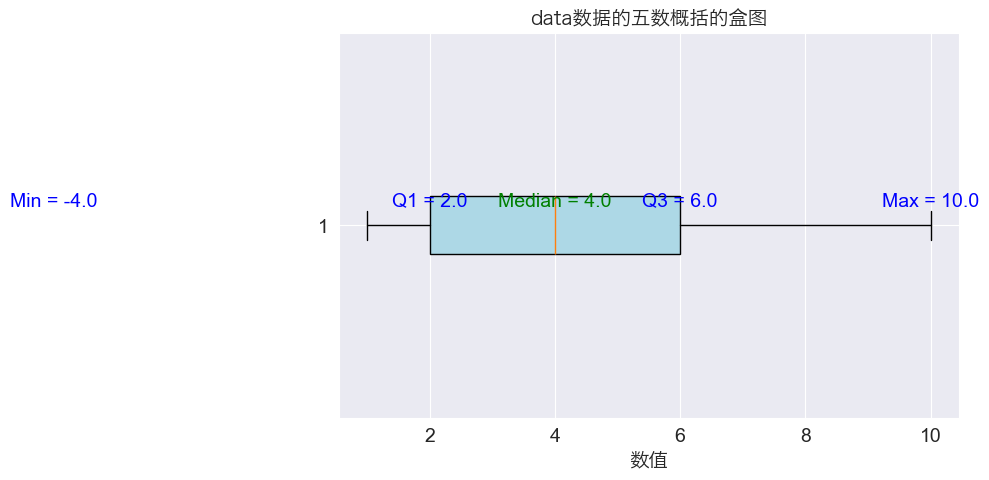

In [362]:
# 绘制盒图
plt.figure(figsize=(8, 5))

plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# 标注五数
plt.text(min_obs, 1.05, f'Min = {min_obs}', horizontalalignment='center', color='blue')
plt.text(Q1, 1.05, f'Q1 = {Q1}', horizontalalignment='center', color='blue')
plt.text(median_value, 1.05, f'Median = {median_value}', horizontalalignment='center', color='green') # 设置偏移量，防止图例重合
plt.text(Q3, 1.05, f'Q3 = {Q3}', horizontalalignment='center', color='blue')
plt.text(max_obs, 1.05, f'Max = {max_obs}', horizontalalignment='center', color='blue')

# 设置图表标题和标签
plt.title('data数据的五数概括的盒图',fontproperties=font)
plt.xlabel('数值',fontproperties=font)

# 显示图表
plt.show()

In [363]:
# ...出了点小问题。。。。。。。
# data_df = pd.DataFrame(data, columns=['Values'])
# 
# # 绘制盒图
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=data_df['Values'])
# 
# # 添加五数概括的标注
# plt.text(0.1, min_obs, f'Min: {min_obs}', horizontalalignment='center', color='blue')
# plt.text(0.1, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='green')
# plt.text(0.1, median, f'Median: {median}', horizontalalignment='center', color='orange')
# plt.text(0.1, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', color='purple')
# plt.text(0.1, max_obs, f'Max: {max_obs}', horizontalalignment='center', color='red')
# 
# # 添加标题和标签
# plt.title('五数盒图', fontsize=16)
# plt.xlabel('值', fontsize=14)
# 
# # 显示图表
# plt.show()

## 3.相似度计算

### 3.1.1 欧氏距离

In [369]:
print(first_column)
print(second_column)
point1=first_column # 假设第一个点是这683维的坐标组成（第一列）
point2=second_column # 第二列

0      5
1      5
2      3
3      6
4      4
      ..
678    3
679    2
680    5
681    4
682    4
Name: 0, Length: 683, dtype: int64
0       1
1       4
2       1
3       8
4       1
       ..
678     1
679     1
680    10
681     8
682     8
Name: 1, Length: 683, dtype: int64


In [370]:
# 计算欧氏距离 方法1
euclidean_distance = np.linalg.norm(point1 - point2)
euclidean_distance 

73.45747068882783

In [373]:
# 计算欧氏距离 方法2
euclidean_distance = distance.euclidean(point1, point2)
euclidean_distance

73.45747068882783

### 3.1.2曼哈顿距离

In [374]:
# 计算曼哈顿距离 方法1
manhattan_distance = np.sum(np.abs(point1 - point2))
manhattan_distance

1464

In [375]:
# 计算曼哈顿距离 方法2
manhattan_distance = distance.cityblock(point1, point2)
manhattan_distance

1464

### 3.1.3切比雪夫距离

In [376]:
# 计算切比雪夫距离
chebyshev_distance = distance.chebyshev(point1, point2)
chebyshev_distance

9

### 3.1.4余弦距离

In [378]:
# 计算余弦距离
cosine_dist = distance.cosine(point1, point2)
cosine_dist

0.15462407733260852

## 4.数据相关性计算

In [386]:
# 计算协方差矩阵
cov_matrix = np.cov(point1, point2)
cov_matrix
# 获取协方差值
# cov_value = cov_matrix[0, 1] 根据位置自己选择数值
# cov_value

array([[7.95669442, 5.55492201],
       [5.55492201, 9.39511299]])

In [385]:
# 计算相关系数矩阵
corr_matrix = np.corrcoef(point1, point2)
corr_matrix
# 获取相关系数
#  corr_value = corr_matrix[0, 1]

array([[1.        , 0.64248149],
       [0.64248149, 1.        ]])